<a href="https://colab.research.google.com/github/santosmgs/UP-STYLE---Challange-IA-S3/blob/main/UP_STYLE_Challange_Sprint_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Início**

Para obter os dados demográficos mencionados no vídeo anterior, é necessário criar um dataset com as informações necessárias. Então, utilizamos o site do IBGE para extrair os dados necessários.

###**Objetivo**

1.   Extrair a proporção de pessoas vulneráveis, como o percentual de população em diferentes condições de vulnerabilidade.
2.   Identificar quais fatores contribuem mais para a vulnerabilidade em cada subgrupo.
1.   Proporção de pessoas em situação de pobreza, com o percentual de população vivendo em condições de pobreza em diferentes UFs.
2.   Fatores que mais influenciam a pobreza multidimensional em cada UF.

### **Motivo:**

**Com essas informações conseguimos:**



*   Analisar a vulnerabilidade e pobreza: Compreender as áreas e subgrupos mais vulneráveis e em situação de pobreza, o que é crucial para avaliar o potencial de mercado e a demanda por produtos de moda.
*   Regionalizar o consumo: Identificar quais regiões apresentam melhores condições socioeconômicas e, portanto, maior potencial de consumo.
*   Identificar fatores de influência: Entender os principais fatores que contribuem para a vulnerabilidade e pobreza, ajudando a ajustar estratégias de marketing e de produto.









# **Criando o Dataset**

Utilizando dados do IBGE, criamos um dataset com as seguintes informações:

- Proporção de pessoas das famílias residentes
- Proporção de pessoas com algum grau de vulnerabilidade
- IVM-NM e contribuições para o IVM-NM do Brasil segundo os condicionantes e subgrupos selecionados-período 2017-2018 (este é o dado mais recente)

Fonte: https://www.ibge.gov.br/estatisticas/sociais/rendimento-despesa-e-consumo/9050-pesquisa-de-orcamentos-familiares.html

In [ ]:
import pandas as pd
from io import StringIO

# CSV data
csv_data = """
"Condicionantes e subgrupos selecionados","Proporção de pessoas das famílias residentes (%)","Proporção de pessoas com algum grau de vulnerabilidade (%)","IVM-NM","Contribuição para o IVM-NM do Brasil","Contribuição para o IVM-NM do Brasil (%)"
"Localização geográfica do domicílio","","","","",""
"Brasil",100.0,63.8,7.7,7.7,100.0
"Urbano",85.3,58.8,6.3,5.4,69.8
"Rural",14.7,92.9,15.8,2.3,30.2
"Grandes Regiões","","","","",""
"Norte",8.6,86.2,13.7,1.2,15.2
"Nordeste",27.3,82.3,12.2,3.3,43.1
"Sudeste",42.2,52.1,5.0,2.1,27.2
"Sul",14.3,47.3,3.9,0.6,7.2
"Centro-Oeste",7.7,68.2,7.3,0.6,7.3
"Pessoa de referência","","","","",""
"Composição demográfica","","","","",""
"Até 24 anos",3.1,69.8,8.3,0.3,3.4
"25 a 49 anos",52.5,63.8,7.7,4.1,52.7
"50 a 64 anos",28.9,63.2,7.7,2.2,29.1
"65 anos ou mais",15.5,63.8,7.4,1.1,14.9
"Cor ou raça","","","","",""
"Brancos",41.4,49.4,4.8,2.0,25.7
"Pretos e pardos",57.2,74.5,9.9,5.6,73.2
"Sexo","","","","",""
"Homem",59.7,60.8,7.1,4.2,55.0
"Mulher",40.3,68.3,8.6,3.5,45.0
"Nível de instrução","","","","",""
"Sem instrução",7.0,94.5,16.7,1.2,15.2
"Ensino fundamental incompleto",36.8,81.9,11.0,4.0,52.4
"Ensino fundamental completo",8.8,64.5,7.0,0.6,8.0
"Ensino médio incompleto",5.0,70.1,7.3,0.4,4.8
"Ensino médio completo",25.3,51.5,4.6,1.2,15.2
"Ensino superior incompleto",3.3,41.1,3.4,0.1,1.5
"Ensino superior completo",13.7,24.8,1.6,0.2,2.9
"Ocupação e formalização","","","","",""
"Empregado doméstico",5.5,82.0,11.4,0.6,8.1
"Empregado Privado",31.3,58.7,6.2,1.9,25.1
"Militar e empregado do setor público",9.1,46.0,4.1,0.4,4.9
"Conta própria",22.2,71.1,9.4,2.1,27.1
"Empregador",3.5,33.8,2.8,0.1,1.3
"Fora da força de trabalho e outros casos",28.4,69.6,9.1,2.6,33.5
"Características da família","","","","",""
"Composição da família","","","","",""
"Um adulto sem criança",3.1,54.2,5.9,0.2,2.3
"Um adulto com ao menos uma criança",2.4,67.9,8.3,0.2,2.6
"Mais de um adulto sem criança",27.7,56.8,6.3,1.7,22.7
"Mais de um adulto com ao menos uma criança",45.4,67.9,8.7,4.0,51.5
"Um ou mais idosos com ou sem crianças",4.4,54.7,5.5,0.2,3.1
"Um ou mais idosos, com ao menos um adulto, com ou sem crianças",17.0,67.8,8.0,1.4,17.7
"Décimos da renda disponível familiar per capita","","","","",""
"1º",10.0,94.2,18.0,1.8,23.4
"2º",10.0,89.6,13.2,1.3,17.2
"3º",10.0,83.0,11.0,1.1,14.3
"4º",10.0,78.0,9.1,0.9,11.8
"5º",10.0,71.3,7.5,0.8,9.8
"6º",10.0,64.8,6.3,0.6,8.2
"7º",10.0,58.4,5.0,0.5,6.5
"8º",10.0,47.7,3.6,0.4,4.6
"9º",10.0,35.0,2.5,0.2,3.2
"10º",10.0,16.0,0.8,0.1,1.1
"""

# Create a DataFrame
df = pd.read_csv(StringIO(csv_data))

# Save the DataFrame to a CSV file
df.to_csv('dadosDemograficos1.csv', index=False)

# Command to download the file in Google Colab
from google.colab import files
files.download('dadosDemograficos1.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Set pandas options to display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

,Condicionantes e subgrupos selecionados,Proporção de pessoas das famílias residentes (%),Proporção de pessoas com algum grau de vulnerabilidade (%),IVM-NM,Contribuição para o IVM-NM do Brasil,Contribuição para o IVM-NM do Brasil (%)
0,Localização geográfica do domicílio,NaN,NaN,NaN,NaN,NaN
1,Brasil,100.0,63.8,7.7,7.7,100.0
2,Urbano,85.3,58.8,6.3,5.4,69.8
3,Rural,14.7,92.9,15.8,2.3,30.2
4,Grandes Regiões,NaN,NaN,NaN,NaN,NaN


# **Proporção de pessoas com algum grau de vulnerabilidade (%)**

### **Justificativa:**

Neste gráfico temos uma visão direta da porcentagem de população que enfrenta algum nível de vulnerabilidade, e isso é preciso para entender o mercado potencial e o poder de compra.

### **Explicação do gráfico:**

Este gráfico apresenta a distribuição da proporção de pessoas com algum grau de vulnerabilidade em diferentes grupos. As barras abaixo representam a quantidade de grupos, que possuem uma determinada proporção de pessoas vulneraveis.


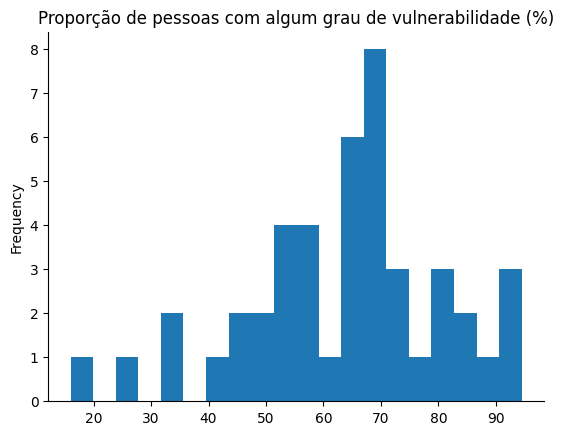

In [ ]:
# @title Proporção de pessoas com algum grau de vulnerabilidade (%)

from matplotlib import pyplot as plt
df['Proporção de pessoas com algum grau de vulnerabilidade (%)'].plot(kind='hist', bins=20, title='Proporção de pessoas com algum grau de vulnerabilidade (%)')
plt.gca().spines[['top', 'right',]].set_visible(False)

# **IVM-NM**

### **Justificativa:**

O Índice de Vulnerabilidade Multidimensional não Monetário (IVM-NM) fornece uma medida composta que reflete a vulnerabilidade das famílias em vários aspectos, além da renda, ajudando a identificar regiões ou subgrupos com maiores desafios.

### **Explicação do gráfico:**

 Aqui temos a distribuição do IVM-NM entre diferentes grupos. As barras representam a quantidade de grupos que têm um determinado nível de IVM-NM.




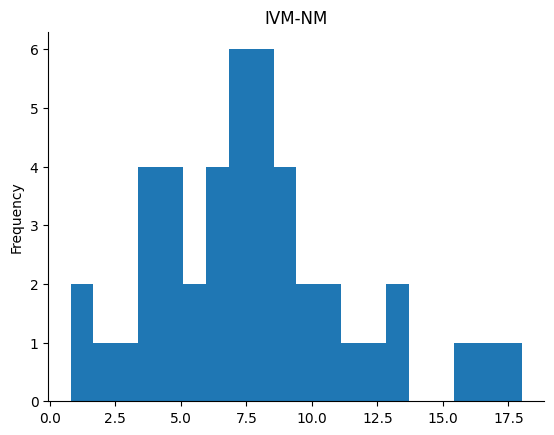

In [ ]:
# @title IVM-NM

from matplotlib import pyplot as plt
df['IVM-NM'].plot(kind='hist', bins=20, title='IVM-NM')
plt.gca().spines[['top', 'right',]].set_visible(False)

# **Proporção de pessoas das famílias residentes (%) vs Proporção de pessoas com algum grau de vulnerabilidade (%)**


### **Justificativa:**

Neste gráfico de comparação, é mostrado como a distribuição da população se relaciona com os níveis de vulnerabilidade, permitindo identificar padrões ou correlações importantes para decisões de investimento.

### **Explicação do gráfico:**
O gráfico abaixo de dispersão compara a proporção de pessoas residentes com a proporção de pessoas vulneráveis em diferentes grupos. Cada ponto representa um grupo específico.

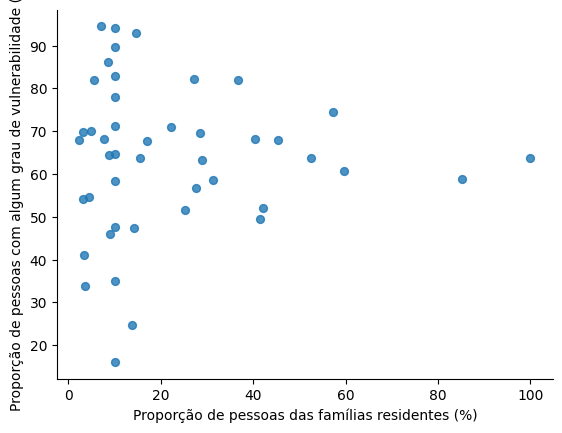

In [ ]:
# @title Proporção de pessoas das famílias residentes (%) vs Proporção de pessoas com algum grau de vulnerabilidade (%)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Proporção de pessoas das famílias residentes (%)', y='Proporção de pessoas com algum grau de vulnerabilidade (%)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# **IVM-NM vs Contribuição para o IVM-NM do Brasil**

### **Justificativa:**

 Este gráfico ajuda a entender como diferentes níveis de vulnerabilidade (IVM-NM) se relacionam com suas contribuições para o índice geral, permitindo identificar os principais fatores de risco e vulnerabilidade que podem afetar o consumo de moda.

### **Explicação do gráfico:**



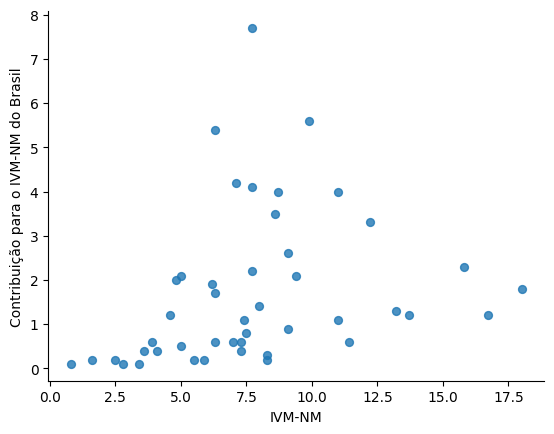

In [ ]:
# @title IVM-NM vs Contribuição para o IVM-NM do Brasil

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='IVM-NM', y='Contribuição para o IVM-NM do Brasil', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# **Continuação do projeto - 3 Sprint**

Observação: Para facilitar o entendimento mantivemos o código anterior para ter mais facilidade na compreensão do código que vamos apresentar.

# **Protótipo**

Para realizar o nosso protótipo funcional optamos pela **análise de correlação e regressão linear**

### **Código para Análise de Correlação e Regressão**

In [ ]:
import pandas as pd
from io import StringIO

# Dataset
csv_data = """
"Condicionantes e subgrupos selecionados","Proporção de pessoas das famílias residentes (%)","Proporção de pessoas com algum grau de vulnerabilidade (%)","IVM-NM","Contribuição para o IVM-NM do Brasil","Contribuição para o IVM-NM do Brasil (%)"
"Brasil",100.0,63.8,7.7,7.7,100.0
"Urbano",85.3,58.8,6.3,5.4,69.8
"Rural",14.7,92.9,15.8,2.3,30.2
"Norte",8.6,86.2,13.7,1.2,15.2
"Nordeste",27.3,82.3,12.2,3.3,43.1
"Sudeste",42.2,52.1,5.0,2.1,27.2
"Sul",14.3,47.3,3.9,0.6,7.2
"Centro-Oeste",7.7,68.2,7.3,0.6,7.3
"""

# Criar DataFrame
df = pd.read_csv(StringIO(csv_data))

# Exibir DataFrame
print(df.head())


  Condicionantes e subgrupos selecionados  \
0                                  Brasil   
1                                  Urbano   
2                                   Rural   
3                                   Norte   
4                                Nordeste   

   Proporção de pessoas das famílias residentes (%)  \
0                                             100.0   
1                                              85.3   
2                                              14.7   
3                                               8.6   
4                                              27.3   

   Proporção de pessoas com algum grau de vulnerabilidade (%)  IVM-NM  \
0                                               63.8              7.7   
1                                               58.8              6.3   
2                                               92.9             15.8   
3                                               86.2             13.7   
4                                

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Definir a variável independente (X) e a variável dependente (y)
X = df[['Proporção de pessoas com algum grau de vulnerabilidade (%)']]
y = df['IVM-NM']  # variável dependente

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Coeficientes
print(f"Intercepto: {model.intercept_}")
print(f"Coeficiente: {model.coef_[0]}")


Intercepto: -9.264205816554805
Coeficiente: 0.26363792806745817


O coeficiente mostra a força e a direção da relação entre as variáveis, enquanto o intercepto é o ponto de partida da linha de regressão no eixo vertical.

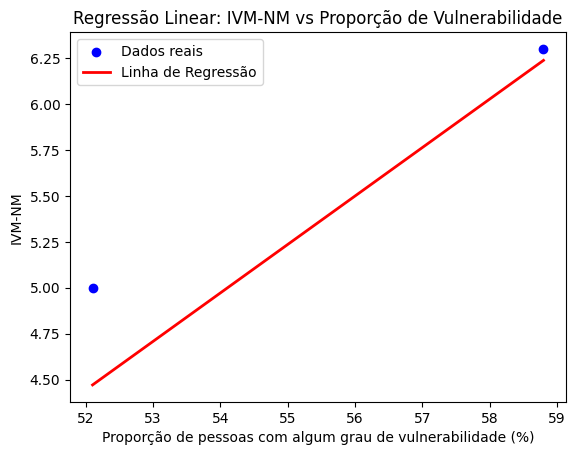

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Fazer previsões com os dados de teste
y_pred = model.predict(X_test)

# Plotar a regressão
plt.scatter(X_test, y_test, color='blue', label="Dados reais")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Linha de Regressão")
plt.title("Regressão Linear: IVM-NM vs Proporção de Vulnerabilidade")
plt.xlabel("Proporção de pessoas com algum grau de vulnerabilidade (%)")
plt.ylabel("IVM-NM")
plt.legend()
plt.show()


## **Análise de Correlação**

A correlação mede o grau de associação entre duas variáveis, ou seja, mostra se uma variável aumenta ou diminui à medida que a outra muda. Isso visa analisar a vulnerabilidade e pobreza em diferentes regiões e subgrupos.


### **Para que serve essa informação?**

- Entender fatores de vulnerabilidade
- Direcionar estratégia de mercado
- Fazer análises de prioridades regionais

## **Análise de Regressão**

A regressão vai além da correlação, pois não apenas mede a relação entre duas variáveis, mas também nos ajuda a modelar essa relação, fornecendo uma equação que pode ser usada para fazer previsões. Ela estima o impacto de uma ou mais variáveis independentes (fatores) em uma variável dependente (outcome). A regressão é crucial para quantificar como determinados fatores afetam a vulnerabilidade e a pobreza.

### **Para que serve essa informação?**

- Quantificar do Impacto de Fatores Socioeconômicos
- Identificar de Variáveis Críticas
- Previsões e Simulações para Empresas

# **Integrantes do grupo:**

*   Felipe Morais - RM551463
*   João Gabriel - RM 552078
*   Miguel Santos - 551640
*   Ian – RM 550133